In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target


In [4]:
df = pd.read_csv('C:/Users/gane0/Videos/Bhavana/crimes.csv')
df1 = pd.read_csv('C:/Users/gane0/Videos/Bhavana/crimes1.csv')
data = pd.concat([df,df1],axis=1)
data.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Crime_Rate,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,...,ARSON,HURT/GREVIOUS_HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,0,ANDHRA PRADESH,ADILABAD,2019,0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,...,30.0,1131.0,16.0,149.0,34.0,175.0,0.0,181.0,1518.0,4154.0
1,1,ANDHRA PRADESH,ANANTAPUR,2019,1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,...,69.0,1543.0,7.0,118.0,24.0,154.0,0.0,270.0,754.0,4125.0
2,2,ANDHRA PRADESH,CHITTOOR,2019,0,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,...,38.0,2088.0,14.0,112.0,83.0,186.0,0.0,404.0,1262.0,5818.0
3,3,ANDHRA PRADESH,CUDDAPAH,2019,1,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,...,23.0,795.0,17.0,126.0,38.0,57.0,0.0,233.0,1181.0,3140.0
4,4,ANDHRA PRADESH,EAST GODAVARI,2019,1,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,...,41.0,1244.0,12.0,109.0,58.0,247.0,0.0,431.0,2313.0,6507.0


## BASIC CHECKS

In [5]:
data.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Crime_Rate,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,...,ARSON,HURT/GREVIOUS_HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,0,ANDHRA PRADESH,ADILABAD,2019,0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,...,30.0,1131.0,16.0,149.0,34.0,175.0,0.0,181.0,1518.0,4154.0
1,1,ANDHRA PRADESH,ANANTAPUR,2019,1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,...,69.0,1543.0,7.0,118.0,24.0,154.0,0.0,270.0,754.0,4125.0
2,2,ANDHRA PRADESH,CHITTOOR,2019,0,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,...,38.0,2088.0,14.0,112.0,83.0,186.0,0.0,404.0,1262.0,5818.0
3,3,ANDHRA PRADESH,CUDDAPAH,2019,1,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,...,23.0,795.0,17.0,126.0,38.0,57.0,0.0,233.0,1181.0,3140.0
4,4,ANDHRA PRADESH,EAST GODAVARI,2019,1,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,...,41.0,1244.0,12.0,109.0,58.0,247.0,0.0,431.0,2313.0,6507.0


In [6]:
data.tail()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Crime_Rate,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,...,ARSON,HURT/GREVIOUS_HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
10672,832,Lakshadweep,Lakshadweep,2023,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10673,833,Lakshadweep,Total District(s),2023,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10674,834,Puducherry,Karaikal,2023,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10675,835,Puducherry,Puducherry,2023,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10676,836,Puducherry,Total District(s),2023,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.columns

Index(['Unnamed: 0', 'STATE/UT', 'DISTRICT', 'Year', 'Crime_Rate', 'STATE/UT',
       'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT_TO_MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING&ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO_THEFT', 'OTHER_THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS_HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

* Patient ID feature return twice

In [8]:
data.shape

(10677, 38)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           10677 non-null  int64  
 1   STATE/UT                                             10677 non-null  object 
 2   DISTRICT                                             10677 non-null  object 
 3   Year                                                 10677 non-null  int64  
 4   Crime_Rate                                           10677 non-null  int64  
 5   STATE/UT                                             9840 non-null   object 
 6   DISTRICT                                             9840 non-null   object 
 7   YEAR                                                 9840 non-null   float64
 8   MURDER                                               9840 non-null

In [10]:
data.describe()

,Unnamed: 0,Year,Crime_Rate,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ARSON,HURT/GREVIOUS_HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,10677.000000,10677.000000,10677.00000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,...,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,3871.570198,2020.377353,0.42231,2007.161890,88.565854,78.738618,9.754878,55.456098,0.005488,55.450610,...,25.012398,753.362805,20.179878,106.482520,27.772967,202.046138,0.187602,226.296951,2214.523171,5404.141463
std,2816.369918,2.279970,0.49395,3.755581,325.417692,306.650391,58.733349,201.690457,0.111218,201.676202,...,97.601717,3059.322654,97.446611,423.729483,170.367098,869.325453,2.319261,952.900601,8199.391921,18941.271529
min,0.000000,2016.000000,0.00000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1009.000000,2019.000000,0.00000,2004.000000,18.000000,10.000000,0.000000,8.000000,0.000000,8.000000,...,2.000000,43.750000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,264.000000,857.750000
50%,3678.000000,2021.000000,0.00000,2007.000000,37.000000,28.000000,2.000000,21.000000,0.000000,21.000000,...,8.000000,199.000000,5.000000,33.000000,2.000000,49.000000,0.000000,70.000000,750.000000,2130.500000
75%,6347.000000,2022.000000,1.00000,2010.000000,66.000000,57.000000,6.000000,43.000000,0.000000,43.000000,...,19.000000,533.250000,16.000000,80.000000,13.000000,139.250000,0.000000,180.000000,1631.000000,4025.000000
max,9016.000000,2024.000000,1.00000,2013.000000,7601.000000,7964.000000,1616.000000,4335.000000,5.000000,4335.000000,...,2830.000000,60488.000000,2335.000000,8252.000000,4970.000000,19865.000000,83.000000,16076.000000,127850.000000,234385.000000


In [11]:
# Changing column name: 
data.rename({'slope_of_peak_exercise_st_segment':'sop','resting_blood_pressure':'resting_bp','chest_pain_type':'cpt',
            'num_major_vessels':'major_vessels','fasting_blood_sugar_gt_120_mg_per_dl':'fasting_blood_sugar',
            'resting_ekg_results':'ekg_result','serum_cholesterol_mg_per_dl':'serum_cholesterol',
            'oldpeak_eq_st_depression':'oldpeak_st_depression','max_heart_rate_achieved':'max_heart_rate',
             'heart_disease_present':'heart_disease'},inplace=True,axis=1)

In [12]:
univariate = data[['YEAR','RAPE','KIDNAPPING&ABDUCTION','OTHER_THEFT','ATTEMPT_TO_MURDER','MURDER','THEFT',
                  'RIOTS','CHEATING','ARSON','BURGLARY','AUTO_THEFT','COUNTERFIETING',
                   'HURT/GREVIOUS_HURT']]

In [13]:
data.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Crime_Rate,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,...,ARSON,HURT/GREVIOUS_HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,0,ANDHRA PRADESH,ADILABAD,2019,0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,...,30.0,1131.0,16.0,149.0,34.0,175.0,0.0,181.0,1518.0,4154.0
1,1,ANDHRA PRADESH,ANANTAPUR,2019,1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,...,69.0,1543.0,7.0,118.0,24.0,154.0,0.0,270.0,754.0,4125.0
2,2,ANDHRA PRADESH,CHITTOOR,2019,0,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,...,38.0,2088.0,14.0,112.0,83.0,186.0,0.0,404.0,1262.0,5818.0
3,3,ANDHRA PRADESH,CUDDAPAH,2019,1,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,...,23.0,795.0,17.0,126.0,38.0,57.0,0.0,233.0,1181.0,3140.0
4,4,ANDHRA PRADESH,EAST GODAVARI,2019,1,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,...,41.0,1244.0,12.0,109.0,58.0,247.0,0.0,431.0,2313.0,6507.0


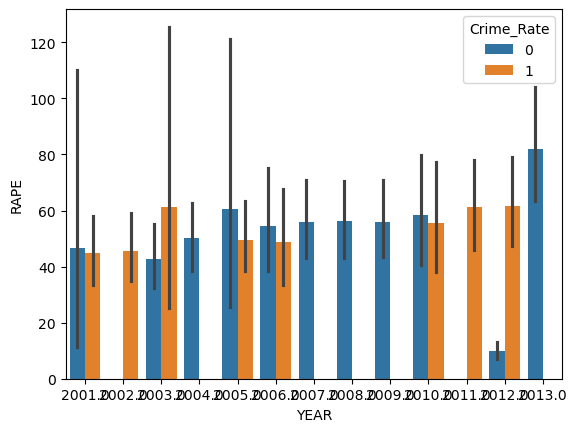

In [14]:
sns.barplot(x='YEAR',y='RAPE',hue=data.Crime_Rate,data=data)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


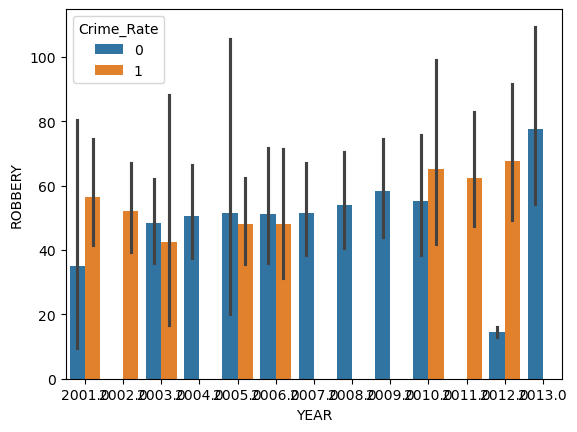

In [16]:
sns.barplot(x='YEAR',y='ROBBERY',hue=data.Crime_Rate,data=data)
plt.show()

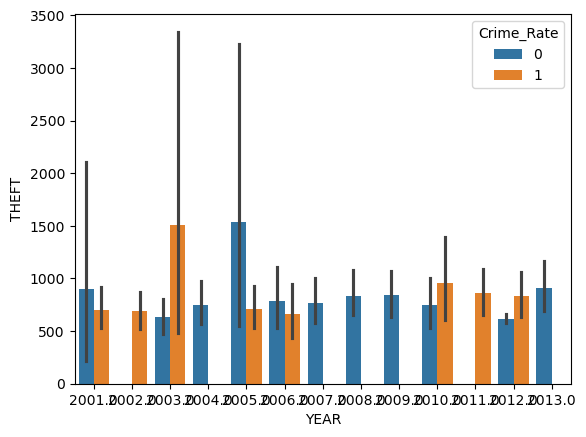

In [17]:
sns.barplot(x='YEAR',y='THEFT',hue=data.Crime_Rate,data=data)
plt.show()

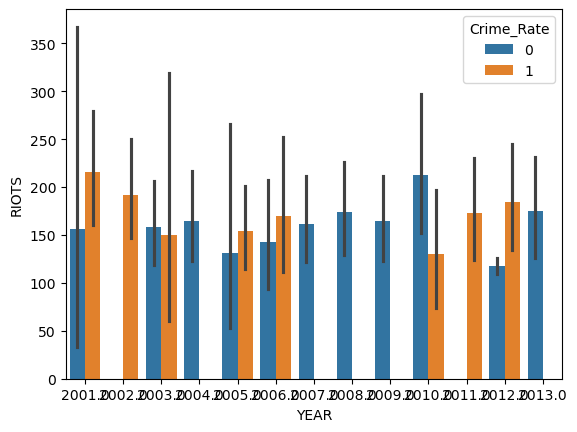

In [18]:
sns.barplot(x='YEAR',y='RIOTS',hue=data.Crime_Rate,data=data)
plt.show()

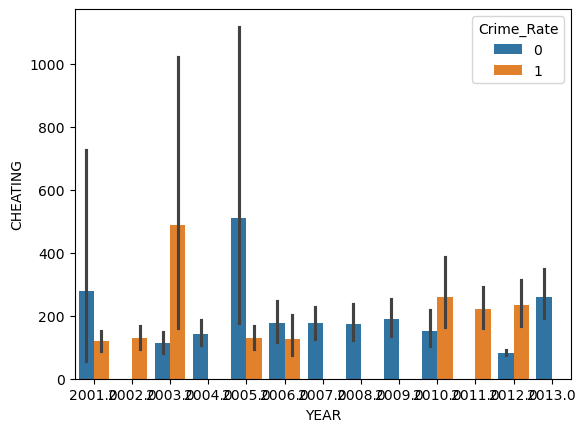

In [19]:
sns.barplot(x='YEAR',y='CHEATING',hue=data.Crime_Rate,data=data)
plt.show()

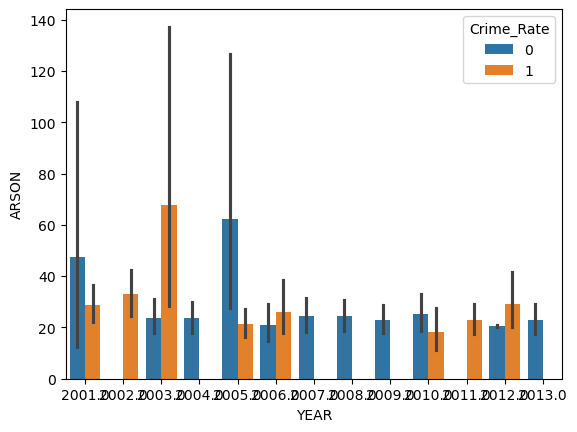

In [20]:
sns.barplot(x='YEAR',y='ARSON',hue=data.Crime_Rate,data=data)
plt.show()

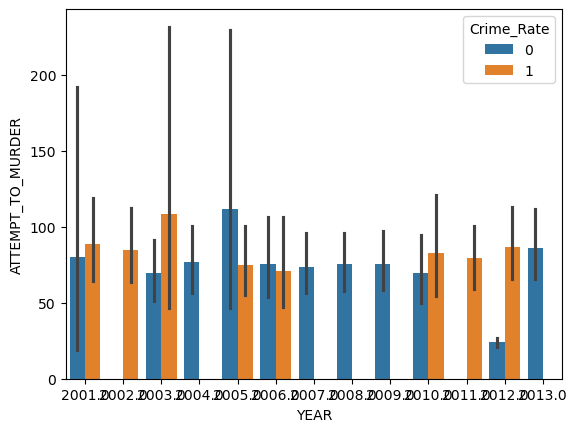

In [21]:
sns.barplot(x='YEAR',y='ATTEMPT_TO_MURDER',hue=data.Crime_Rate,data=data)
plt.show()

In [22]:
data.isnull().sum()

Unnamed: 0                                               0
STATE/UT                                                 0
DISTRICT                                                 0
Year                                                     0
Crime_Rate                                               0
STATE/UT                                               837
DISTRICT                                               837
YEAR                                                   837
MURDER                                                 837
ATTEMPT_TO_MURDER                                      837
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              837
RAPE                                                   837
CUSTODIAL RAPE                                         837
OTHER RAPE                                             837
KIDNAPPING&ABDUCTION                                   837
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            837
KIDNAPPING AND ABDUCTION OF OTHERS                     8

In [24]:
# In this dataset only one categorical data-type feature 
# we use manual encoding to convert categorical data to numerical 
# Getting the value counts of thal
data.RAPE.value_counts()

RAPE
0.0       544
1.0       365
2.0       286
3.0       231
12.0      231
         ... 
224.0       1
1731.0      1
623.0       1
1070.0      1
1636.0      1
Name: count, Length: 449, dtype: int64

In [25]:
data.RAPE = data.RAPE.map({'normal':2,'reversible_defect':1,'fixed_defect':0})
# normal is assign with value 2 because normal has more weightage
# reversible defect assign with value 1 because of less weightage than normal
# fixed defect assign with value 0 because of less weightage

In [26]:
# checking the unique value of thal
data.RAPE.unique()

array([nan])

#### 3.OUTLIER HANDLING
* Handling outlier if it is necessary

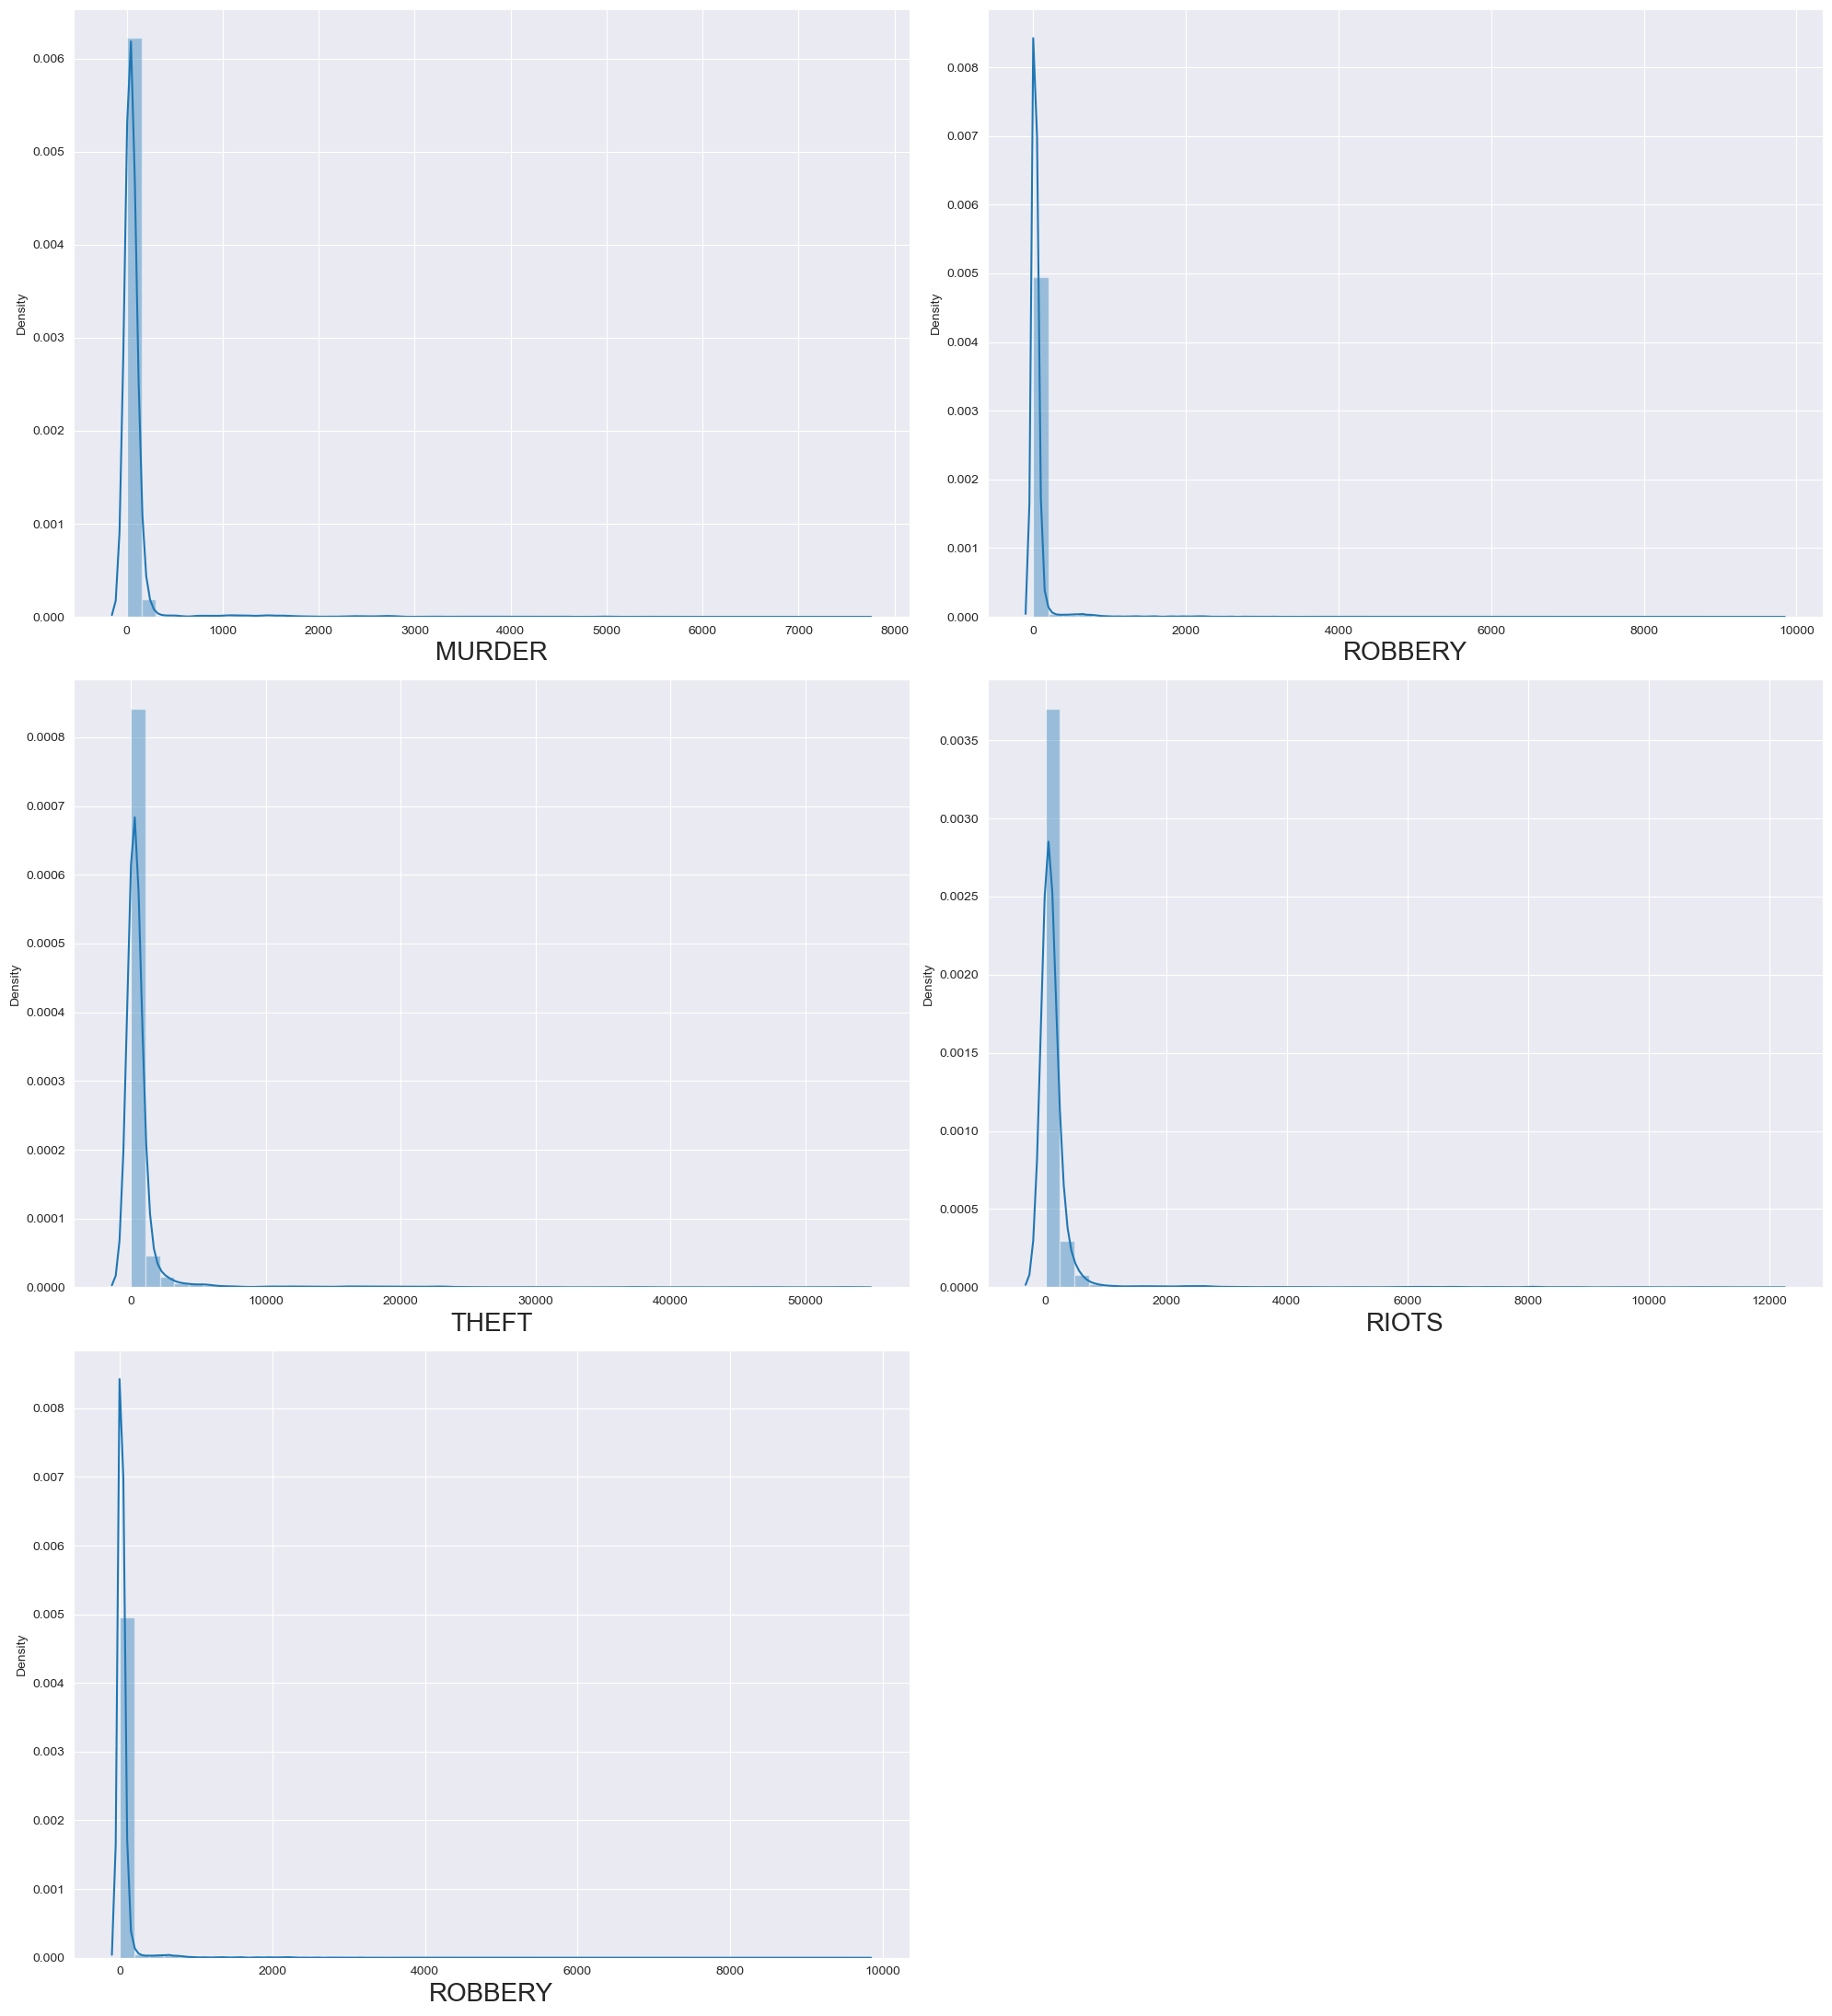

In [29]:
out = data[['MURDER','ROBBERY','THEFT','RIOTS','ROBBERY']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=6:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 5 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.distplot(x=out[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


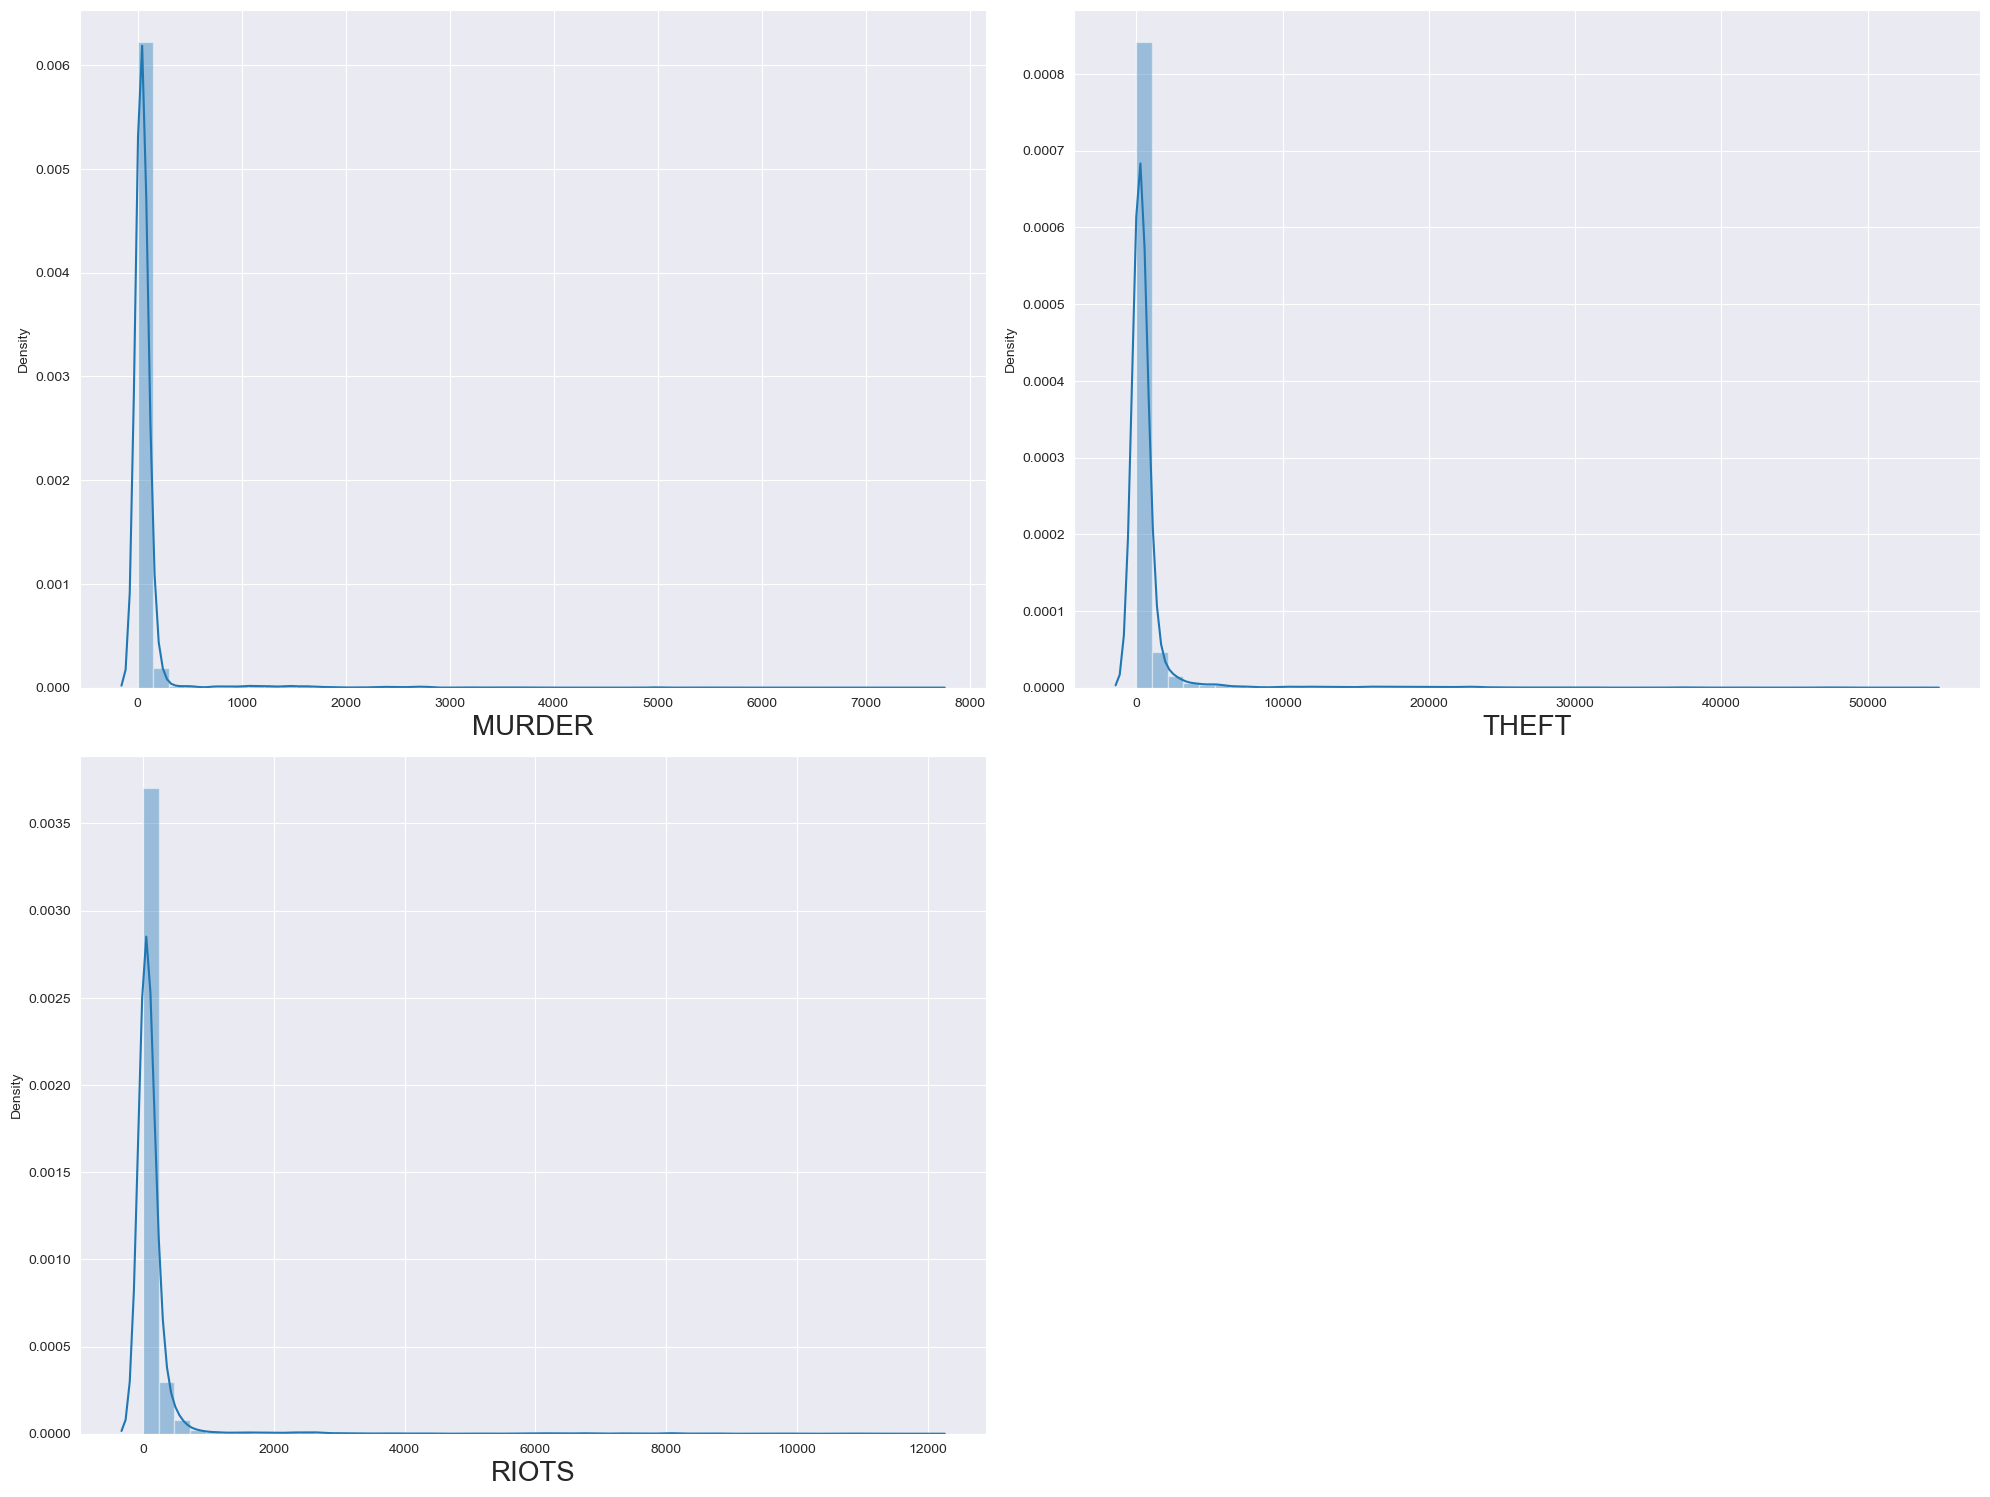

In [39]:
out = data[['MURDER','THEFT','RIOTS']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=6:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 3 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.distplot(x=out[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


In [40]:
# import library
from sklearn.preprocessing import StandardScaler

# Creating object
scale = StandardScaler()

# Scaling the feature 
data[['RAPE','ROBBERY','THEFT','CHEATING','ARSON']] = scale.fit_transform(data[['RAPE','ROBBERY','THEFT','CHEATING','ARSON']])


In [41]:
# Check constant column
data.describe()

,Unnamed: 0,Year,Crime_Rate,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ARSON,HURT/GREVIOUS_HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,10677.000000,10677.000000,10677.00000,9840.000000,9840.000000,9840.000000,9840.000000,0.0,9840.000000,9840.000000,...,9.840000e+03,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,3871.570198,2020.377353,0.42231,2007.161890,88.565854,78.738618,9.754878,NaN,0.005488,55.450610,...,8.665155e-18,753.362805,20.179878,106.482520,27.772967,202.046138,0.187602,226.296951,2214.523171,5404.141463
std,2816.369918,2.279970,0.49395,3.755581,325.417692,306.650391,58.733349,NaN,0.111218,201.676202,...,1.000051e+00,3059.322654,97.446611,423.729483,170.367098,869.325453,2.319261,952.900601,8199.391921,18941.271529
min,0.000000,2016.000000,0.00000,2001.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,-2.562831e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1009.000000,2019.000000,0.00000,2004.000000,18.000000,10.000000,0.000000,NaN,0.000000,8.000000,...,-2.357906e-01,43.750000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,264.000000,857.750000
50%,3678.000000,2021.000000,0.00000,2007.000000,37.000000,28.000000,2.000000,NaN,0.000000,21.000000,...,-1.743132e-01,199.000000,5.000000,33.000000,2.000000,49.000000,0.000000,70.000000,750.000000,2130.500000
75%,6347.000000,2022.000000,1.00000,2010.000000,66.000000,57.000000,6.000000,NaN,0.000000,43.000000,...,-6.160449e-02,533.250000,16.000000,80.000000,13.000000,139.250000,0.000000,180.000000,1631.000000,4025.000000
max,9016.000000,2024.000000,1.00000,2013.000000,7601.000000,7964.000000,1616.000000,NaN,5.000000,4335.000000,...,2.874058e+01,60488.000000,2335.000000,8252.000000,4970.000000,19865.000000,83.000000,16076.000000,127850.000000,234385.000000


In [54]:
# check the shape of X train, y train, X test and y test
X_train.shape

(105, 4)

In [55]:
X_test.shape

(45, 4)

In [56]:
y_train.shape

(105,)

In [57]:
y_test.shape

(45,)

In [58]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_model = LogisticRegression()

# Step:3 Fitting the training data
log_model.fit(X_train,y_train)

# Step:4 Prediction on test data
y_log_predict = log_model.predict(X_test)

# Step:5 Prediction on training data
train_log_predict = log_model.predict(X_train)

In [59]:
# importing library
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report
log_train_accuracy = accuracy_score(train_log_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(train_log_predict,y_train))

Training accuracy of Logistic regression model 96.19047619047619
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.92      0.97      0.94        35
           2       0.97      0.92      0.95        39

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [62]:
# crosstab of logistic regression
pd.crosstab(y_log_predict,y_test)

col_0,0,1,2
row_0,,,
0,19,0,0
1,0,13,0
2,0,0,13


In [63]:
# Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


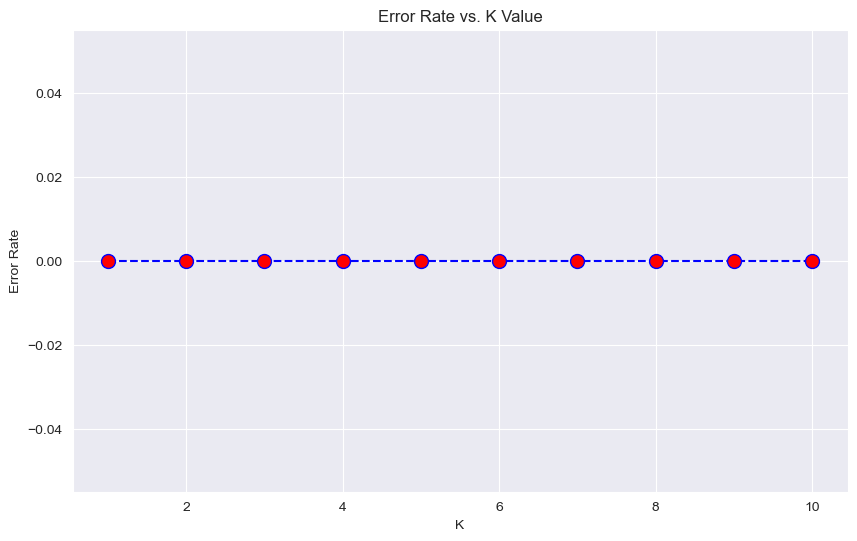

In [64]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [65]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)


In [66]:
knn_train_accuracy = accuracy_score(knn_train_predict,y_train)
print("Training accuracy of knn model ",knn_train_accuracy)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  0.9428571428571428
Training classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.92      0.92      0.92        37
           2       0.92      0.92      0.92        37

    accuracy                           0.94       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.94      0.94      0.94       105



In [67]:
knn_test_accuracy = accuracy_score(knn_test_predict,y_test)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(knn_test_predict,y_test))

Testing accuracy of knn model 100.0
Testing classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [69]:
# Cross tab
pd.crosstab(knn_test_predict,y_test)

col_0,0,1,2
row_0,,,
0,19,0,0
1,0,13,0
2,0,0,13


In [70]:
# Step:1 importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# Step:2 fitting training data
rf.fit(X_train,y_train)

# Step:3 Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Step:4 Prediction on training data
rf_train_predict = rf.predict(X_train)


In [71]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [72]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 100.0
Classification report of testing: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [73]:
# Cross tab
pd.crosstab(rf_test_predict,y_test)

col_0,0,1,2
row_0,,,
0,19,0,0
1,0,13,0
2,0,0,13
